# Шаг 1. Открываем файл с данными и изучаем общую информацию

Импортируем библиотеки pandas, numpy, scipy.stats

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Открываем файл и изучаем его

In [2]:

data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




Проверим дата-сет на присутствие явных дупликатов

In [4]:
data.duplicated().sum()

0

# Шаг 2. Подготовка данных

Заменяем названия столбцов (приводим к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Преобразуем данные в нужные типы:
Преобразуем тип данных столбца выхода года в целочисленный

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')

Преобразуем тип данных столбца оценка пользователей в числовой

В столбце user_score имеется значение tbd. Преобразуем его в NaN

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN')
data['user_score'] = data['user_score'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
#Находим пропуски в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удаляем пропуски в столбцах с названием, годом и жанром
Ввиду того, что данных мало и критические изменения после удаления не произойдут

In [9]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Данные в столбцах с оцеками критиков и пользователей считаю, что заполнять не нужно, т.к. будет существенное изменение текущей картины по оценкам,а эти данные представляют для нас важное значение.

Считаем суммарные продажи игр во всех регионах и добавляем в общий массив данных

In [10]:
data['total_sales']= data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01



Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры), а также игры могли быть выпущены не так давно. Следовательно игры еще не успели набрать свои рейтинги.

Что касается года выпуска, то тоже могли просто не указать, либо могла произойти техническая ошибка во время обработки и получения дата-сета от коллег 


Заполним пропуски в столбце Raiting заглушкой unknow

In [12]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)


На оф. сайте также указана информация о замене рейтинга K-A на E. В связи с этим следует переименовать рейтинг  К-А на Е

In [13]:
data['rating'] = data['rating'].replace({'K-A':'E'})
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

# Шаг 3. Проведение исследовательского анализа данных

В данном разделе нам необходимо определить актуальный период прогнозирования, потенциальные платформы, на которых будут реализовываться игры, а также жанры и влияние рейтингов пользователей и критиков на успешность продаж той или иной игры

Cмотрим, сколько игр выпускалось в разные годы

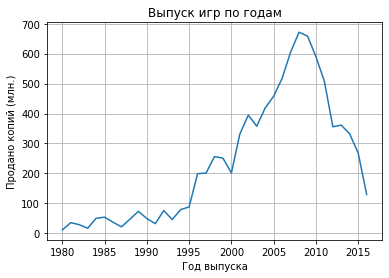

In [14]:
data.groupby('year_of_release')['total_sales'].sum().plot(title='Выпуск игр по годам', xlabel='Год выпуска',\
ylabel='Продано копий (млн.)', grid=True);

Наибольшее кол-во игр было выпущено в 2008г. Cнижение объема выпуска началось в 2009 году. До 1995 года объемы продаж были незначительными, поэтому предлагаю данные по продажам до 1995 исключить из датасета.

In [15]:
data = data.query('year_of_release > 1995')

Посмотрим как менялись продажи по платформам. 
Найдем платформы с наибольшими суммарными продажами

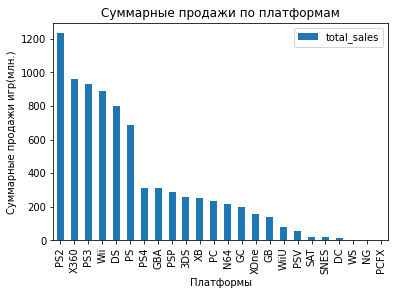

In [16]:
data.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', title='Суммарные продажи по платформам', xlabel='Платформы', ylabel='Суммарные продажи игр(млн.)');

Платформы с наибольшими суммарными продажами:
PS2, X360, PS3, Wii, DS, PS. Построим графики распределение по годам.

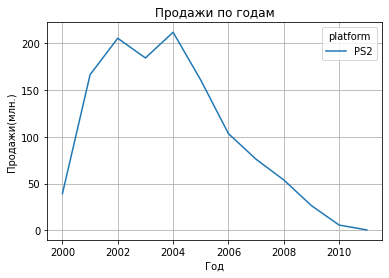

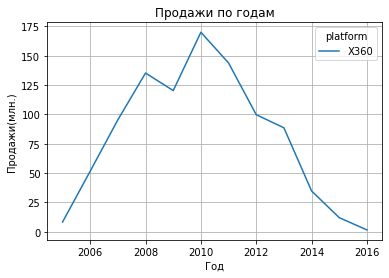

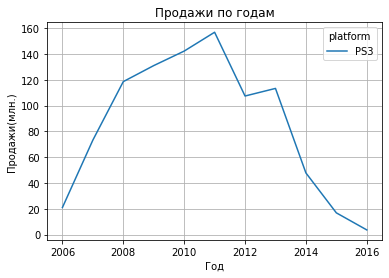

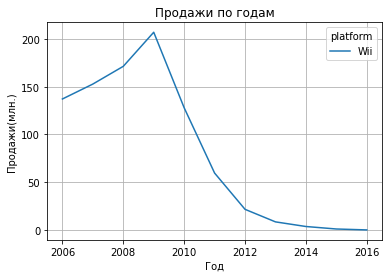

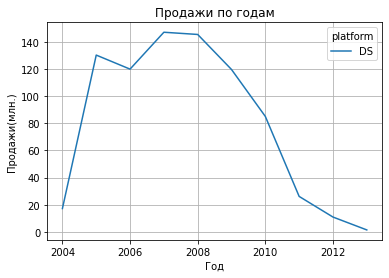

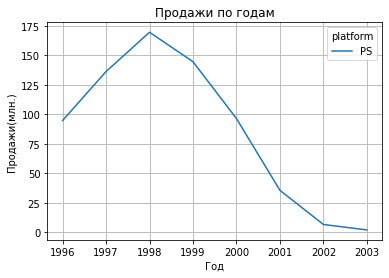

In [17]:
most_pop_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
data_most_pop_sales = data.query('platform in @most_pop_platform')
for i in most_pop_platform:
    data.loc[data['platform'] == i].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(title='Продажи по годам', xlabel='Год', ylabel='Продажи(млн.)', grid=True)

Проведя анализ продаж по годам среди самых продаваемых платформ можно сделать вывод, что средний срок "жизни" одной игровой платформы составляет порядка 8-10 лет. Пик популярности каждой платформы начинается через 4-5 лет после ее выпуска. Т.е. пик популярности платформы приходится на середину ее жизненного цикла.

Учитывая предыдущие исследования, и принимая во внимание бизнес-задачу по поиску платформ, которые лидируют по продажам, а также растут, нам следует в качестве потенциально прибыльных платформ на 2017 год выбрать платформы сроком 2-3 года, т.е. найти платформы, продажи игр на которые начались не раньше 2014 г.

Актуальным периодом для анализа будет период с 2014 по 2016


In [18]:
data = data.query('year_of_release > 2013')
data['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

Находим годовую разбивку суммарных продаж по платформам с 2014г.

In [19]:
platform_since_2014 = data['platform'].unique()
platform_since_2014

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

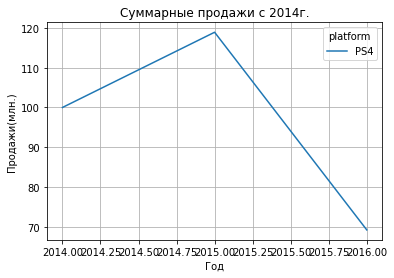

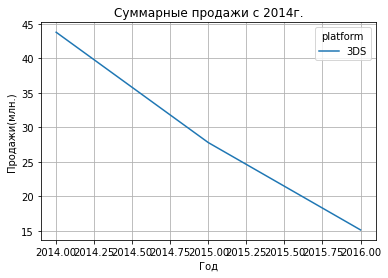

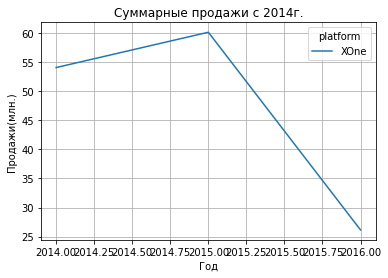

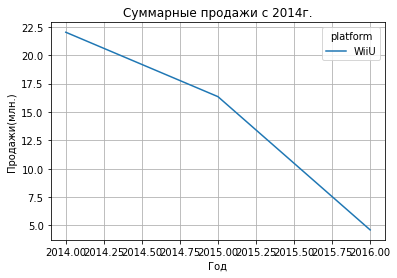

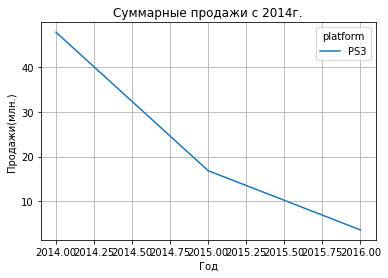

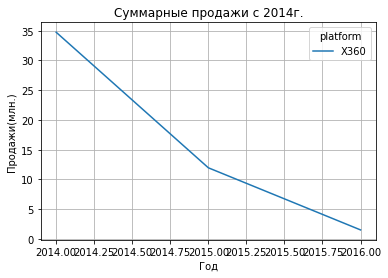

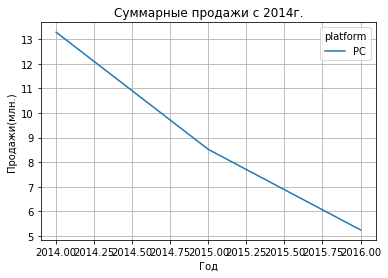

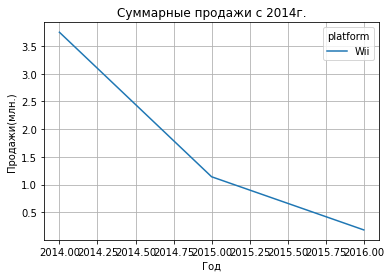

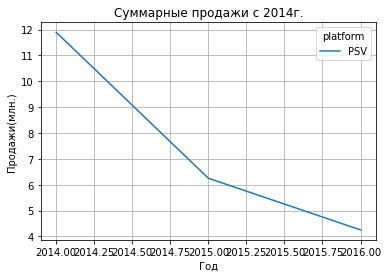

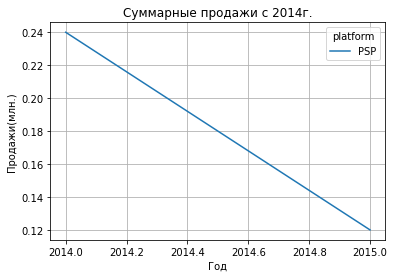

In [20]:
for i in platform_since_2014:
    data.loc[data['platform'] == i].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(title='Суммарные продажи с 2014г.', xlabel='Год', ylabel='Продажи(млн.)', grid=True)
    

Потенциально прибыльными платформами можно считать PS4, XOne

Cтроим график «ящик с усами» по глобальным продажам игр в разбивке по платформам в полном виде со всеми выбросами

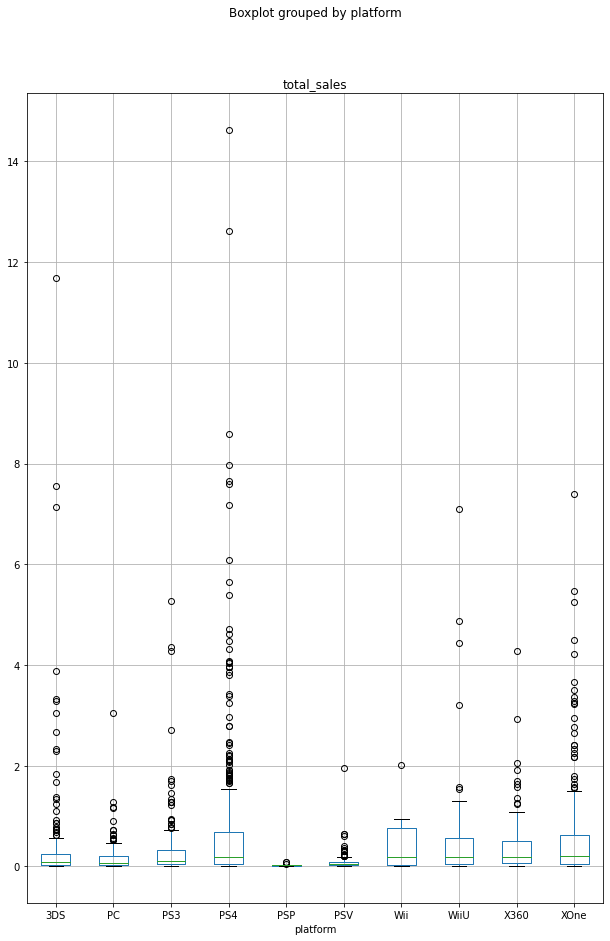

In [21]:
data.boxplot(column='total_sales', by='platform', figsize=(10, 15));

Cтроим график «ящик с усами» по глобальным продажам игр в разбивке по платформам в масштабированном виде

(-0.5, 3.0)

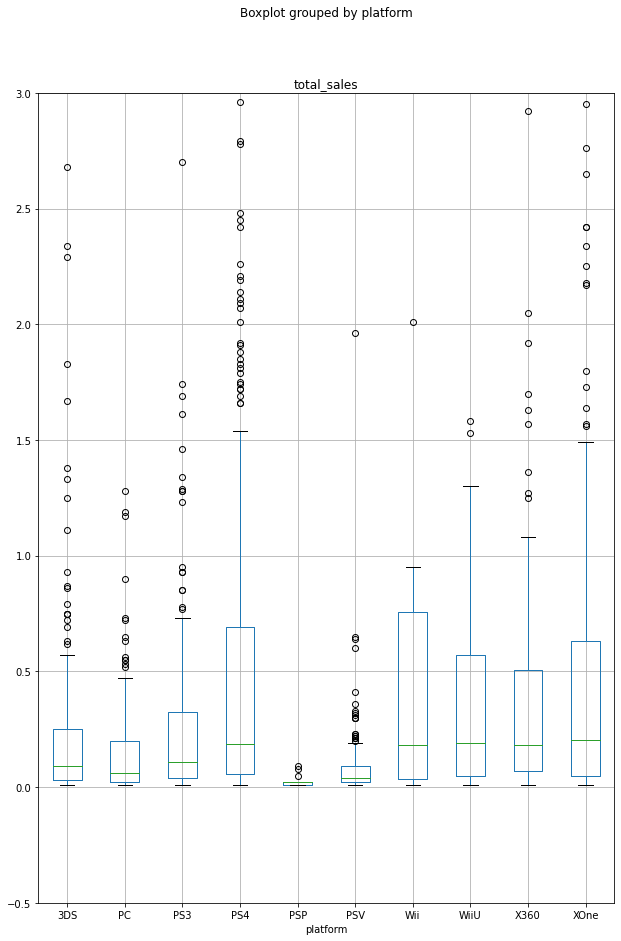

In [22]:
data.boxplot(column='total_sales', by='platform', figsize=(10, 15));
plt.ylim(-0.5,3)

Проведя анализ продаж игр в разбивке по платформам можно сделать вывод, что наибольшее медианное значение продаж, а также более широкое покрытие от Q1 до Q3  имеется на платформах PS4, XOne, Wii. Однако суммарные продажи по платформе Wii с 2014 года неуклонно падают.Платформы PS4, XOne можно использовать, как потенциальные для планирования продаж на 2017 г.

Посмотрим как влияют на продажи внутри платформы XOne отзывы пользователей.

-0.0703839280647581


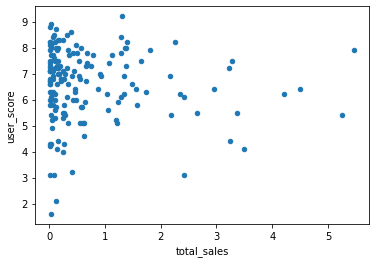

In [23]:
data.query('platform == "XOne"').plot(x='total_sales', y='user_score', kind='scatter');
XOne_data_top_platform = data.query('platform == "XOne"')
print(XOne_data_top_platform['total_sales'].corr(XOne_data_top_platform['user_score']))


Посмотрим как влияют на продажи внутри платформы XOne отзывы критиков.

0.42867694370333226


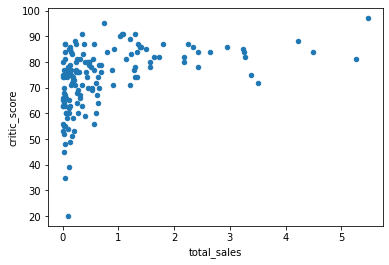

In [24]:
data.query('platform == "XOne"').plot(x='total_sales', y='critic_score', kind='scatter');
XOne_data_top_platform = data.query('platform == "XOne"')
print(XOne_data_top_platform['total_sales'].corr(XOne_data_top_platform['critic_score']))


Проведя анализ продаж игр на платформе XOne на основе отзывов пользователей и критиков можно сделать следующий вывод:
1) Отзывы пользователь имеют очень слабую обратную корреляцию с объемами продаж, равную -7.04%

2) Отзывы критиков влияют на продажи, но не сильно. Данный факт подтверждается слабой корреляцией равной 42.87%

Проверим данный вывод на платформе PS4:

Посмотрим как влияют на продажи внутри платформы PS4 отзывы пользователей.

-0.040131589472697356


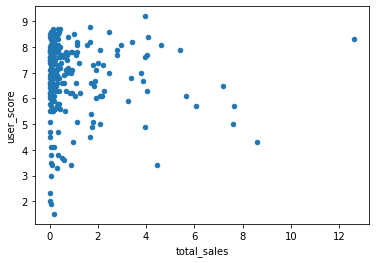

In [25]:
data.query('platform == "PS4"').plot(x='total_sales', y='user_score', kind='scatter');
PS4_data_top_platform = data.query('platform == "PS4"')
print(PS4_data_top_platform['total_sales'].corr(PS4_data_top_platform['user_score']))

Посмотрим как влияют на продажи внутри платформы PS4 отзывы критиков.

0.40266141068104083


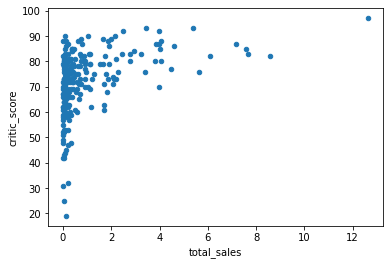

In [26]:
data.query('platform == "PS4"').plot(x='total_sales', y='critic_score', kind='scatter');
PS4_data_top_platform = data.query('platform == "PS4"')
print(PS4_data_top_platform['total_sales'].corr(PS4_data_top_platform['critic_score']))

Наши выводы подтвердились. По графикам рассеивания картина примерно одинаковая. Корреляция по двум видам платформ также находится в одних и тех же зонах силы связи между переменными.



</font><font color='Blue'><b>Комментарий студента</b></font><br>
Спасибо за материал. Учту на будущее

Смотрим на общее распределение жанров игр:

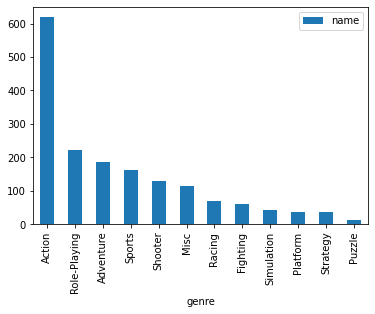

In [27]:
data.groupby('genre')[['name']].count().sort_values(by='name', ascending=False).plot(kind='bar');

Самыми популярными жанрами игр являются: Action, Role-Playing, Adventure, Sports, Shooter. 

Найдем самые прибыльные жанры:

(-0.5, 4.0)

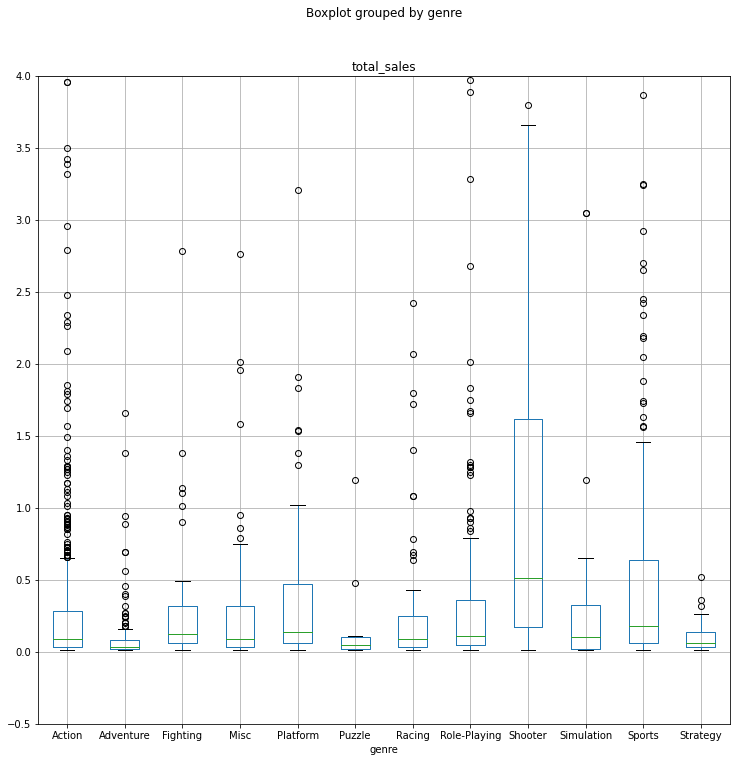

In [29]:
data.boxplot(column='total_sales', by='genre', figsize=(12,12));
plt.ylim(-0.5, 4)

Построив диаграмму размаха можно сделать вывод, что самым прибыльным жанром является Shooter. Наименее прибыльным жанром можно назвать Adventure, Puzzle и Strategy

# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5)

Популярные платформы для Северной Америки:

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


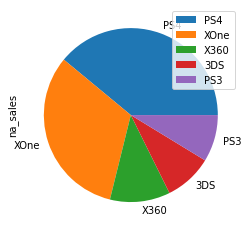

In [30]:
display(data.groupby('platform')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).head())
data.groupby('platform')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).head().plot(kind='pie', y='na_sales');

Популярные платформы для Европы:

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


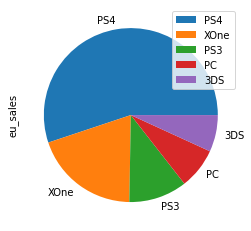

In [31]:
display(data.groupby('platform')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).head())
data.groupby('platform')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).head().plot(kind='pie', y='eu_sales');

Популярные платформы для Японии:

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


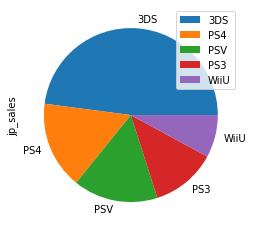

In [32]:
display(data.groupby('platform')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).head())
data.groupby('platform')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).head().plot(kind='pie', y='jp_sales');

Проведя анализ популярности платформ для разных регионов можно сделать следующий вывод:

Самые популярные платформы для Северной Америки: PS4, XOne, X360, 3DS, PS3

Самые популярные платформы для Европы: PS4, XOne, PS3, PC, 3DS

Самые популярные платформы для Японии: 3DS, PS4, PSV, PS3, WiiU

Различия в долях продаж указаны на круговых диаграммах по каждому региону

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5)

Популярные жанры для Северной Америки

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


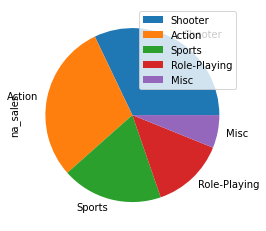

In [33]:
display(data.groupby('genre')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).head())
data.groupby('genre')[['na_sales']].sum().sort_values(by='na_sales', ascending=False).head().plot(kind='pie', y='na_sales');

Популярные жанры для Европы

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


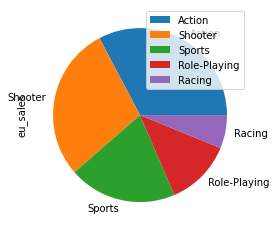

In [34]:
display(data.groupby('genre')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).head())
data.groupby('genre')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False).head().plot(kind='pie', y='eu_sales');

Популярные жанры для Японии

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


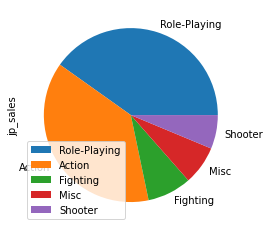

In [35]:
display(data.groupby('genre')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).head())
data.groupby('genre')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False).head().plot(kind='pie', y='jp_sales');

Проведя анализ популярности жанров для разных регионов можно сделать следующий вывод:

Самые популярные жанры для Северной Америки: Shooter, Action, Sports, Role-Playing, Misc

Самые популярные жанры для Европы: Action, Shooter, Sports, Role-Playing, Racing

Самые популярные жанры для Японии: Role-Playing, Action, Fighting, Misc, Shooter

Различия в долях продаж указаны на круговых диаграммах по каждому региону

Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

По Северной Америки

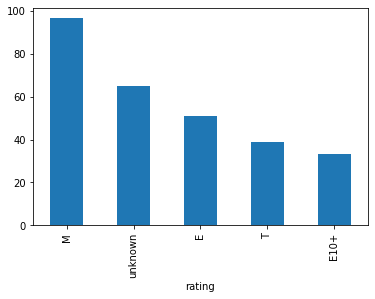

In [36]:
data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar');

По Европе

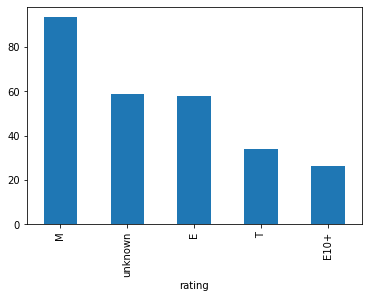

In [37]:
data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar');

По Японии

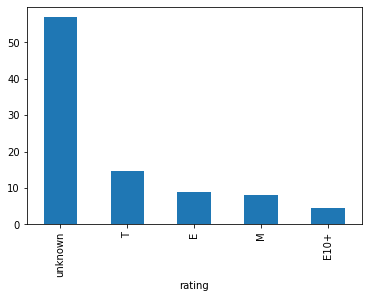

In [38]:
data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar');

Проведя анализ влияния рейтинга игр на объемы продаж для разных регионов можно сделать следующий вывод:

В Северной Америке и Европе наилучшие объемы продаж имеют игры с рейтингом М ("Для взрослых"), а в Японии - без рейтинга (unknown)

В Северной Америке и Европе вторыми по популярности идут без рейтинга (unknown), а в Японии T ("Подросткам")



# Шаг 5. Проверяем гипотезы

В качестве нулевой гипотезы (H0) возьмем гипотезу, что средние пользовательские рейтинги по платформам одинаковые,
а в качестве альтернативной гипотезы (H1): средние рейтинги по платформам разные.
Вытаскиваем из дата-сета рейтинги игр от пользователей для PC и Xbox One

In [40]:
raiting_user_PC = data.loc[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']
print(raiting_user_PC)

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64


In [41]:
raiting_user_Xbox_One = data.loc[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
raiting_user_Xbox_One

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

Применяем проверку гипотезы о равенстве средних двух генеральных совокупностей. Задаем alpha в размере 0.05.

In [42]:
alpha = .05
results = st.ttest_ind(raiting_user_PC, raiting_user_Xbox_One)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


В качестве нулевой гипотезы (H0) возьмем гипотезу, что средние пользовательские рейтинги по двум жанрам одинаковые,
а в качестве альтернативной гипотезы (H1): средние рейтинги по двум жанрам разные.
Вытаскиваем из дата-сета рейтинги по двум жанрам

In [43]:
raiting_user_action = data.loc[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
raiting_user_action

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [44]:
raiting_user_sports = data.loc[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']
raiting_user_sports

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [45]:
alpha = .05
results = st.ttest_ind(raiting_user_action, raiting_user_sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Проверив две гипотизы можно сделать следующие выводы:

1) Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не подтвердилась

2) Гипотеза о разнице средних пользовательских рейтингов жанров Action и Sports подтвердилась




При формировании гипотез были взяты два варианта (булевых значений) возможных исходов. Либо гиотеза подтверждается, либо она не подтверждается. Во второй гипотезе был применен метод от обратного (двойного отрицания) в котором при отвержении "обратной" гипотезы подтверждается гипотеза из задания.

Для проверки гипотез был применен метод двустороннего t-теста потому, что у нас имеется две невзаимосвязанные выборки по двум платформам и двум жанрам, между которыми нужно сравнить свои средние

# Шаг 6. Общий вывод

Проведя анализ продаж по годам среди самых продаваемых платформ можно сделать вывод, что средний срок "жизни" одной игровой платформы составляет порядка 8-10 лет. Пик популярности каждой платформы начинается через 4-5 лет после ее выпуска. Т.е. пик популярности платформы приходится на середину ее жизненного цикла.

Учитывая предыдущие исследования, и принимая во внимание бизнес-задачу по поиску платформ, которые лидируют по продажам, а также растут, нам следует в качестве потенциально прибыльных платформ на 2017 год выбрать платформы сроком 2-3 года, т.е. найти платформы, продажи игр на которые начались не раньше 2014 г.

Актуальным периодом для анализа будет период с 2014 по 2016

Проведя анализ продаж игр в разбивке по платформам можно сделать вывод, что наибольшее медианное значение продаж, а также более широкое покрытие от Q1 до Q3 имеется на платформах PS4, XOne, Wii. Однако суммарные продажи по платформе Wii с 2014 года неуклонно падают. Платформы PS4, XOne можно использовать, как потенциальные для планирования продаж на 2017 г.

Построив диаграмму размаха можно сделать вывод, что самым прибыльным жанром для Северной Америки и Европы является Shooter и Action. Наименее прибыльным жанром можно назвать Adventure, Puzzle и Strategy.

В Северной Америке и Европе наилучшие объемы продаж имеют игры с рейтингом М ("Для взрослых"), а в Японии - без рейтинга (unknown).
В Северной Америке и Европе вторыми по популярности идут без рейтинга (unknown), а в Японии T ("Подросткам").

При планировании продаж не следует обращать внимания на отзывы, потому что корреляция между отзывами критиков и пользователей очень слабая.


Резюмирую: следует выпускать игру на платформе PS4 или XOne, желательно в Европе или Северной Америке, в жанре Action или Shooter. Приоритет жанра игры не имеет, т.к. лучшие продажи в данных регионах имеют игры с рейтингом М ("Для взрослых").



